# Logistic Regression


In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

# read in data
clinical_info = pd.read_csv("cleaned_clinical.csv")
# remove rows that don't have the label of interest
clinical_info = clinical_info.dropna(subset=['tumor_stage']);
clinical_info = clinical_info.drop(['Unnamed: 0'], axis=1)
clinical_info.columns
clinical_info = clinical_info.set_index('submitter_id')
clinical_info = clinical_info.rename_axis('submitter_id')
len(clinical_info.index)



clinical_info.info()


<class 'pandas.core.frame.DataFrame'>
Index: 534 entries, TCGA-BP-5198 to TCGA-B0-5691
Data columns (total 12 columns):
gender                    534 non-null object
year_of_birth             534 non-null float64
race                      534 non-null object
ethnicity                 534 non-null object
year_of_death             161 non-null float64
primary_diagnosis         534 non-null object
tumor_stage               534 non-null float64
age_at_diagnosis          533 non-null float64
vital_status              534 non-null object
days_to_death             176 non-null float64
days_to_last_follow_up    382 non-null float64
age_at_death              175 non-null float64
dtypes: float64(7), object(5)
memory usage: 54.2+ KB


## Prepping data for logistic regression
We want to train our model to predict whether patients are alive or dead (i.e. vital_sign).

Before training our model, our data needs further cleaning. 
We will hide features related to death (year_of_death, days_to_death, age_at_death) as the model could predict alive/dead based on whether patients have death statistics.

In [3]:
# Delete death-related columns from dataset
delete_cols = ['year_of_death', 'days_to_death', 'age_at_death']

clinical_info = clinical_info.drop(delete_cols, axis=1)


clinical_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534 entries, TCGA-BP-5198 to TCGA-B0-5691
Data columns (total 9 columns):
gender                    534 non-null object
year_of_birth             534 non-null float64
race                      534 non-null object
ethnicity                 534 non-null object
primary_diagnosis         534 non-null object
tumor_stage               534 non-null float64
age_at_diagnosis          533 non-null float64
vital_status              534 non-null object
days_to_last_follow_up    382 non-null float64
dtypes: float64(4), object(5)
memory usage: 41.7+ KB


In [4]:
clinical_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534 entries, TCGA-BP-5198 to TCGA-B0-5691
Data columns (total 9 columns):
gender                    534 non-null object
year_of_birth             534 non-null float64
race                      534 non-null object
ethnicity                 534 non-null object
primary_diagnosis         534 non-null object
tumor_stage               534 non-null float64
age_at_diagnosis          533 non-null float64
vital_status              534 non-null object
days_to_last_follow_up    382 non-null float64
dtypes: float64(4), object(5)
memory usage: 41.7+ KB


In [5]:
# separate data from labels
clinical_info.target = np.array(clinical_info['vital_status'])
clinical_info.data = clinical_info.loc[:, clinical_info.columns != 'vital_status']

clinical_info.target
clinical_info.data


/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,gender,year_of_birth,race,ethnicity,primary_diagnosis,tumor_stage,age_at_diagnosis,days_to_last_follow_up
submitter_id,,,,,,,,
TCGA-BP-5198,male,1936.0,white,not reported,"Clear cell adenocarcinoma, NOS",3.0,26360.0,603.0
TCGA-B0-4706,male,1946.0,white,not hispanic or latino,"Clear cell adenocarcinoma, NOS",3.0,22331.0,26.0
TCGA-BP-4760,male,1935.0,black or african american,not hispanic or latino,"Clear cell adenocarcinoma, NOS",1.0,25268.0,2361.0
TCGA-CZ-5462,male,1924.0,white,not reported,"Clear cell adenocarcinoma, NOS",4.0,30659.0,NaN
TCGA-AK-3427,male,1939.0,white,not hispanic or latino,"Clear cell adenocarcinoma, NOS",1.0,24067.0,3583.0
TCGA-BP-4343,male,1939.0,white,not reported,"Clear cell adenocarcinoma, NOS",3.0,23498.0,NaN
TCGA-CZ-5468,male,1923.0,white,not hispanic or latino,"Clear cell adenocarcinoma, NOS",4.0,30729.0,59.0
TCGA-BP-4334,male,1947.0,white,not reported,"Clear cell adenocarcinoma, NOS",3.0,20609.0,645.0
TCGA-A3-A6NI,male,1964.0,black or african american,not hispanic or latino,"Renal cell carcinoma, NOS",1.0,17190.0,1018.0


In [6]:
# use Pandas getdummies for encoding factor data
clinical_info.encoded = pd.get_dummies(clinical_info.data, dummy_na= True)

# test if there are any NAs in the df
clinical_info.encoded = clinical_info.encoded.replace(np.nan, 0)
clinical_info.encoded.isnull().values.any()

# attempt to cluster using knn
y = clinical_info.target
X = clinical_info.encoded


X.head()

/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,year_of_birth,tumor_stage,age_at_diagnosis,days_to_last_follow_up,gender_female,gender_male,gender_nan,race_asian,race_black or african american,race_not reported,race_white,race_nan,ethnicity_hispanic or latino,ethnicity_not hispanic or latino,ethnicity_not reported,ethnicity_nan,"primary_diagnosis_Clear cell adenocarcinoma, NOS","primary_diagnosis_Renal cell carcinoma, NOS",primary_diagnosis_nan
submitter_id,,,,,,,,,,,,,,,,,,,
TCGA-BP-5198,1936.0,3.0,26360.0,603.0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
TCGA-B0-4706,1946.0,3.0,22331.0,26.0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
TCGA-BP-4760,1935.0,1.0,25268.0,2361.0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
TCGA-CZ-5462,1924.0,4.0,30659.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
TCGA-AK-3427,1939.0,1.0,24067.0,3583.0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score


lr = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=1000, random_state=42)

scores = cross_val_score(lr, X, y, cv=cv, scoring='accuracy')


/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: 

/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: 

/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: 

/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: 

/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: 

/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: 

/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: 

/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: 

/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: 

/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Me/anaconda3/envs/ml_class/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: 

Accuracy: 0.91 (+/- 0.05)


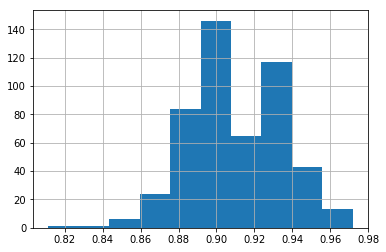

In [8]:
pd.Series(scores).hist()

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))